# 6.5 ESA Task 6.5 Extension - SRS United States

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Verify United States dataset import results; data wrangling

#### 03. Data preprocessing

#### 04. PCA (Principal Components Analysis)

#### 05. k-means clustering

#### 06. Visualizations

#### 07. Task 6.5 Extension: United States SRS component data derivation

### 01. Import libraries and datasets

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to try to mitigate annoying Windows-constraint related warnings
import sklearn
from sklearn.cluster import KMeans # Imports the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # Imports z-score method scaling function to standardize (normalize) numerical data.
from sklearn.decomposition import PCA # Imports the PCA algorithm for PCA analysis.

In [7]:
# This option ensures the plots created in the notebook are displayed without the need to "call" them specifically.
%matplotlib inline

In [9]:
# Import datasets

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

us_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
exo_shk_flags = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'exo_shk_flags_copy.pkl'))
fx_vix_comm_pre_stat = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

### 02. Verify United States dataset import results; data wrangling

#### Note: this analysis segment will focus on US original raw data variables rather than the transformed annual log return & first difference %'s versions, to ensure like-with-like comparison of the US country-level PCA + k-means clustering results with Norway's results.

#### Verify import results

In [11]:
us_pre_stat.shape

(243, 29)

In [13]:
us_pre_stat.head(15)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5103,United States,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5104,United States,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5105,United States,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5106,United States,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5107,United States,2005-05-01,2005,5,2005-05,May,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5108,United States,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5109,United States,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5110,United States,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5111,United States,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN
5112,United States,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,...,295516599.0,NaN,NaN,NaN,NaN,NaN,NaN,0.034401,NaN,NaN


In [15]:
us_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5343,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,347300000.0,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117
5344,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,347300000.0,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117
5345,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,347300000.0,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117


In [17]:
us_pre_stat.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'int_rate_ovn', 'int_rate_3m', 'int_rate_10y',
       'stock_index', 'cons_prices', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'int_rate_ovn_diff', 'int_rate_3m_diff',
       'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

#### Data wrangling

#### Reshape and reset the index for the "us_pre_stat" dataframe to match the temporal period range and indexing of the other dataframes, which run from Jan 2006 to Mar 2025, on a monthly temporal grain.

In [19]:
# Reset the index (the argument "drop=True" drops the original index)
us_pre_stat.reset_index(drop=True, inplace=True)

In [21]:
# Delete first 12 rows and overwrite the dataframe
us_pre_stat.drop(index=range(12), inplace=True)

In [23]:
us_pre_stat.shape

(231, 29)

In [25]:
us_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
12,United States,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,298379912.0,0.0201,0.0195,0.0020,0.124852,0.039001,0.048386,0.027615,-0.120144,0.009689
13,United States,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,298379912.0,0.0199,0.0195,0.0040,0.105110,0.035330,0.048386,0.027615,-0.117783,0.009689
14,United States,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,298379912.0,0.0196,0.0191,0.0022,0.117391,0.033043,0.048386,0.027615,-0.101096,0.009689


In [27]:
# Reset the index (the argument "drop=True" drops the original index)
us_pre_stat.reset_index(drop=True, inplace=True)

In [29]:
us_pre_stat.head(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
0,United States,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,...,298379912.0,0.0201,0.0195,0.0020,0.124852,0.039001,0.048386,0.027615,-0.120144,0.009689
1,United States,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,...,298379912.0,0.0199,0.0195,0.0040,0.105110,0.035330,0.048386,0.027615,-0.117783,0.009689
2,United States,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,...,298379912.0,0.0196,0.0191,0.0022,0.117391,0.033043,0.048386,0.027615,-0.101096,0.009689


In [31]:
us_pre_stat.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
228,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,347300000.0,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117
229,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,347300000.0,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117
230,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,347300000.0,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117


#### Verify the "exo_shk_flags" dataframe content is as expected.

In [37]:
exo_shk_flags.shape

(231, 7)

In [39]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [41]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [43]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

#### Verify the "fx_vix_comm_pre_stat" dataframe content is as expected.

In [47]:
fx_vix_comm_pre_stat.shape

(243, 74)

In [49]:
fx_vix_comm_pre_stat.head(15)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,2005,1,2005-01,Jan,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,2005,2,2005-02,Feb,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,2005,3,2005-03,Mar,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,2005,4,2005-04,Apr,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,2005,5,2005-05,May,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,2005,6,2005-06,Jun,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,2005,7,2005-07,Jul,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,2005,8,2005-08,Aug,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,2005,9,2005-09,Sep,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,2005,10,2005-10,Oct,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [53]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Reshape the "fx_vix_comm_pre_stat" dataframe to have the same temporal range and index number sequence as the other dataframes, which means deleting the year 2005 monthly data rows (which have NaN values for all the annual log return variables based on the 12-period lag in the log return calculation).

In [56]:
# Delete first 12 rows and overwrite the dataframe
fx_vix_comm_pre_stat.drop(index=range(12), inplace=True)

In [58]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [60]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [62]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [64]:
# Reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_pre_stat.reset_index(drop=True, inplace=True)

In [66]:
fx_vix_comm_pre_stat.shape

(231, 74)

In [68]:
fx_vix_comm_pre_stat.head(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,2006,1,2006-01,Jan,False,False,False,False,False,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,2006,2,2006-02,Feb,False,False,False,False,False,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,2006,3,2006-03,Mar,False,False,False,False,False,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [70]:
fx_vix_comm_pre_stat.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [72]:
fx_vix_comm_pre_stat.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

#### Create "df3" subset dataframe with seven (7) original raw data variables (pre-log return transformations) to examine

In [74]:
df3 = us_pre_stat[['int_rate_10y', 'stock_index', 'cons_prices', 'unemp_rate']].copy()

In [76]:
df3[['vix_avg', 'gbp_usd', 'usd_jpy']] = fx_vix_comm_pre_stat[['vix_avg', 'gbp_usd', 'usd_jpy']]

In [78]:
df3.shape

(231, 7)

In [80]:
df3.head(3)

,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy
0,4.42,74.89,83.66,4.7,12.04,1.76,115.66
1,4.57,75.37,83.83,4.8,12.47,1.75,117.97
2,4.72,76.56,84.30,4.7,11.69,1.74,117.20


In [82]:
df3.tail(3)

,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy
228,4.63,183.05,134.03,4.0,16.76,1.23,156.57
229,4.45,187.78,134.62,4.1,16.97,1.25,151.73
230,4.28,182.06,134.93,4.1,21.84,1.29,149.10


In [84]:
df3.dtypes

int_rate_10y    float64
stock_index     float64
cons_prices     float64
unemp_rate      float64
vix_avg         float64
gbp_usd         float64
usd_jpy         float64
dtype: object

In [86]:
df3.columns

Index(['int_rate_10y', 'stock_index', 'cons_prices', 'unemp_rate', 'vix_avg',
       'gbp_usd', 'usd_jpy'],
      dtype='object')

#### Create subset dataframe with timestamp & shock name variables for later reinsertion and use in plot analyses after PCA & clustering, on the exact same indexing sequence as the "df3" dataframe.

In [141]:
exo_shk_flags.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'shock_name'],
      dtype='object')

In [143]:
timestamp_shock = exo_shk_flags[['timestamp', 'shock_name']]

In [145]:
timestamp_shock.shape

(231, 2)

In [147]:
timestamp_shock.head(3)

,timestamp,shock_name
0,2006-01-01,No Shock
1,2006-02-01,No Shock
2,2006-03-01,No Shock


In [149]:
timestamp_shock.tail(3)

,timestamp,shock_name
228,2025-01-01,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,Rus_Ukr_War & BOJ Pivot


In [151]:
timestamp_shock.columns

Index(['timestamp', 'shock_name'], dtype='object')

In [153]:
timestamp_shock.dtypes

timestamp     datetime64[ns]
shock_name            object
dtype: object

### Note: Data consistency, accuracy and other checks were conducted on the imported dataframes in prior Tasks, thus will not be repeated here.

### 03. Data preprocessing

#### Standardization of different-scales data is necessary before PCA & clustering work, so the imported StandardScaler function will be applied. It uses the z-score method for scaling, which is appropriate for the use case here. For other types of tasks, specifically DL (deep learning) algorithm uses, the "minmax" rather than z-score method (and therefore, a different function selection) would be the right tool for rescaling.

In [90]:
# Standardize (normalize) the numerical data

scaler = StandardScaler()
df3_std = scaler.fit_transform(df3)

In [92]:
df3_std.shape

(231, 7)

In [94]:
# Output using StandardScaler() is an array. Check the first 3 rows of the multi-dimensional array.
# Note that NumPy arrays are optimized for numerical computations, so arrays are preferred over dataframes in various ML applications.

df3_std[0:3]

array([[ 1.41371976, -0.93508995, -1.47869229, -0.52042428, -0.88603278,
         1.16216723,  0.28732829],
       [ 1.54925942, -0.92048917, -1.46613626, -0.47452202, -0.83466908,
         1.11871997,  0.40891532],
       [ 1.68479908, -0.8842914 , -1.43142253, -0.52042428, -0.92784044,
         1.07527271,  0.36838631]])

### PCA of the standardized raw data from the United States 7-variable dataset

### 04. PCA (Principal Components Analysis)

In [98]:
# Create a PCA instance (e.g. instantiate) and fit same to the "df3_std" standardized data array for the original raw data
pca3 = PCA()
pca3.fit(df3_std)

PCA()

In [100]:
# PCA creates as many components as there are numerical features in the fitted array
# Apply the .explained_variance_ratio_ attribute to reveal how much data variance is explained by each of the seven individual components

pca3.explained_variance_ratio_

array([0.5164154 , 0.23798779, 0.13130777, 0.06017524, 0.03260355,
       0.016914  , 0.00459623])

#### This result tracks Norway's. Only 3 principal components may collectively explain well above 80% of the variance in the data.

Text(0, 0.5, 'Cumulative Explained Variance')

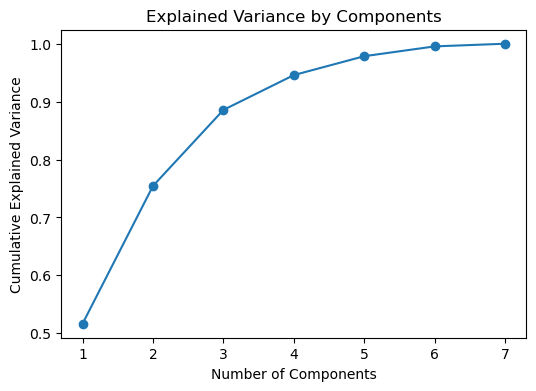

In [103]:
# Plot cumulative variance explained by total number of components, using the .cumsum() method
# We can use the "Elbow" technique to try to optimize for the subset of components we want to retain for k-means clustering work
# A rule-of-thumb is to select sufficient principal components to reach ~ 80% cumulative sum of explained variance

plt.figure(figsize = (6, 4))
plt.plot(range(1,8), pca3.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### As for Norway, 3 components would be a sensible choice, based on the "Elbow" technique and aiming for ~ 80% or higher cumulative variance explained.

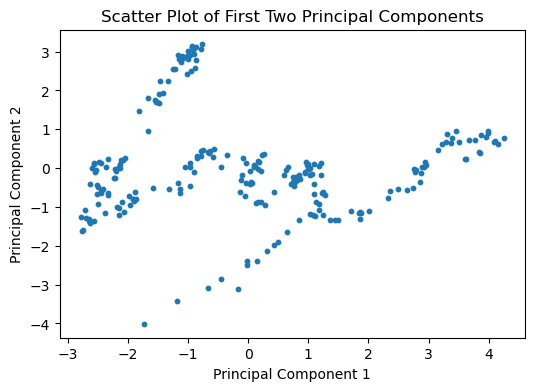

In [106]:
# Scatterplotting in 2D the first two (2) principal components against each other to look for any clear clusters
# Because pca3.fit() here outputs a fitted object but does not directly output a transformed dataset, we need to transform the object
# The fit_transform() function will fit the PCA model to the data and transform it to the new principal component space (coordinates system)
# We create a PCA object with n_components=2, to select the first two principal components

pca3_2 = PCA(n_components=2)
pca3_results_2 = pca3_2.fit_transform(df3_std)

plt.figure(figsize=(6, 4))
plt.scatter(pca3_results_2[:,0], pca3_results_2[:,1], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(False)
plt.show()

#### The visual separability of the data (above) suggests that k-means clustering should work for this standardized US dataset, as it did for Norway's.

### 05. k-means clustering

In [110]:
# From PCA we decided to keep only 3 components (of 7) for the originally-sourced raw data (standardized) in the "df1_std" array
# We need to instantiate an object again by applying the PCA() function to 3 components

pca3 = PCA(n_components = 3)

In [112]:
# Fit the pca3 model to the standardized data in the "df3_std" array, with the selected three (3) components
pca3.fit(df3_std)

PCA(n_components=3)

In [114]:
# Obtain the component loadings matrix
# The matrix shows how much each original variable contributes to each of the three (3) principal components (PCs)
# The loadings help us later interpret what each PC represents conceptually in terms of behaviors (i.e. "risk-on vs defensive", etc.)

loadings_df3 = pd.DataFrame(pca3.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca3.n_components_)],
                           index=df3.columns)

In [116]:
loadings_df3.shape

(7, 3)

#### Loadings of the principal components

In [119]:
# Check the loadings of the principal components
loadings_df3

,PC1,PC2,PC3
int_rate_10y,0.055782,0.665767,0.404386
stock_index,0.499817,-0.081714,-0.020337
cons_prices,0.480596,-0.216682,0.142980
unemp_rate,-0.393401,-0.293737,0.115768
vix_avg,-0.166773,-0.316101,0.861900
gbp_usd,-0.351620,0.502516,0.009498
usd_jpy,0.458132,0.253776,0.243414


#### These are excellent loadings, similar results to Norway's but with some different key driver components contributing to the PCs.

In [121]:
# Use the transform() function to create PCA scores which will be incorporated in the k-means algorithm
# That will permit clustering segmentation based on principal components scores rather than original features

pca3.transform(df3_std)

array([[-1.02367368e+00,  2.42789302e+00, -3.63659936e-01],
       [-9.58425108e-01,  2.49352064e+00, -2.28583520e-01],
       [-8.85783137e-01,  2.58409524e+00, -2.65442292e-01],
       [-8.74075325e-01,  2.78930533e+00, -1.43846088e-01],
       [-1.16758114e+00,  2.91685114e+00,  1.02601853e-01],
       [-1.15054134e+00,  2.80041887e+00,  3.94664953e-01],
       [-1.08450432e+00,  2.84285758e+00,  2.45111157e-01],
       [-1.09294185e+00,  2.89717051e+00, -2.90974097e-02],
       [-1.01439074e+00,  2.89283204e+00, -2.08104957e-01],
       [-9.04822472e-01,  2.94540963e+00, -2.86386624e-01],
       [-9.72960792e-01,  2.91673855e+00, -3.97800655e-01],
       [-9.98612247e-01,  3.00292926e+00, -4.00942456e-01],
       [-9.38526142e-01,  3.12799328e+00, -2.68203532e-01],
       [-8.68520053e-01,  3.10555030e+00, -2.67308519e-01],
       [-1.00871592e+00,  2.79802645e+00,  4.69645014e-02],
       [-9.19255754e-01,  3.03563162e+00, -1.05255492e-01],
       [-7.85093327e-01,  3.06026492e+00

#### Save the PCA scores

In [123]:
# Save the principal components scores array output for use in the k-means algorithm
scores_pca3 = pca3.transform(df3_std)

#### The next step is to determine the number of clusters for the k-means algorithm, starting with a "plug" number of 10, then having the algorithm test varying cluster numbers and determining the WCSS ("Within Cluster Sum of Squares") of each, which when plotted against cluster number allows us to visually use the "Elbow" technique (again) to optimize for the number of clusters to adopt. The "Elbow" technique is equally relevant to PCA-based principal component selection as to k-means-based cluster number selection.  WCSS quantifies the compactness of a cluster, calculated by summing the squared distances between each data point and the centroid of its respective cluster. The smaller the WCSS, the better for a clustering goal.

#### k-means clustering with PCA

In [126]:
# Fit k-means algorithm with the transformed data from the PCA
# The "random_state= [any integer value]" argument ensures reproducibility of results
# This "seeding" of the random number generator is needed because k-means is a non-deterministic algorithm

wcss3 = []

for i in range(1,11):
    kmeans_pca3 = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)  # Create a KMeans instance with i clusters: kmeans_pca
    kmeans_pca3.fit(scores_pca3)  # Fit the model to the PCA scores
    wcss3.append(kmeans_pca3.inertia_)  # Append the inertia value (e.g., the WCSS calculated value) to the list of inertias

In [128]:
wcss3[0:3]

[1432.194632557689, 826.2272879076727, 601.8259354821673]

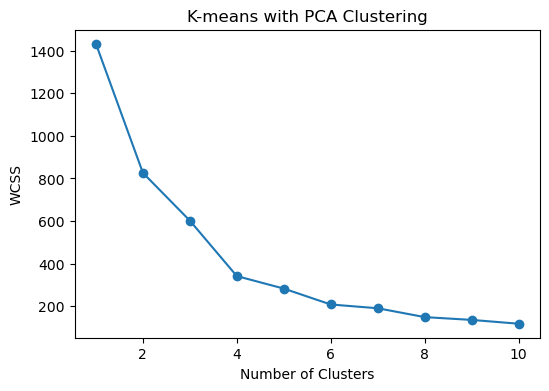

In [130]:
# Plot the WCSS against the number of components in a line plot

plt.figure(figsize = (6, 4))
plt.plot(range(1,11), wcss3, marker = 'o', linestyle = '-')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Using the "Elbow" technique, the magic number is four (4) clusters here, one more than the three (3) for Norway. Beyond four (4) clusters is where the rate of deceleration (translation: improvement) of WCSS minimization ("compression") tails off sharply.

In [133]:
# We will run the k-means clustering algorithm on 4 clusters, based on the WCSS line plot against number of clusters
# Apply same initializer and random state integer used prior (above)

kmeans_pca3 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 2)

In [135]:
# Fit the scores_pca3 with the kmeans_pca3 model

kmeans_pca3.fit(scores_pca3)

KMeans(n_clusters=4, random_state=2)

### Results: k-means clustering with PCA

#### Create a new dataframe that takes the original source dataframe, adds the components' scores from the scores_pca3 array (to be labeled Component 1, 2 and 3), and the cluster labels. Also add a 'Segment' new column to name each of the four clusters (initially as "first", "second", "third" and "fourth", which can be swapped later for more descriptive names). Finally, add columns for 'timestamp' and the categorical variable 'shock_name', in order to compare behavioral patterns in the data with exogenous shock periods, a key goal of this Task 6.5.

In [155]:
df3_pca_kmeans_time_shk = pd.concat([timestamp_shock, df3, pd.DataFrame(scores_pca3)], axis = 1) # Concatenates 3 longitudinally-equal datasets
df3_pca_kmeans_time_shk.columns.values[-3: ] = ['component 1', 'component 2', 'component 3'] # Renames the principal component columns
df3_pca_kmeans_time_shk['segment k-means pca'] = kmeans_pca3.labels_   # Adds a column with the clustering labels

In [157]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy,component 1,component 2,component 3,segment k-means pca
0,2006-01-01,No Shock,4.42,74.89,83.66,4.7,12.04,1.76,115.66,-1.023674,2.427893,-0.363660,0
1,2006-02-01,No Shock,4.57,75.37,83.83,4.8,12.47,1.75,117.97,-0.958425,2.493521,-0.228584,0
2,2006-03-01,No Shock,4.72,76.56,84.30,4.7,11.69,1.74,117.20,-0.885783,2.584095,-0.265442,0


In [159]:
df3_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy,component 1,component 2,component 3,segment k-means pca
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,4.63,183.05,134.03,4.0,16.76,1.23,156.57,4.247834,0.784736,1.129110,3
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,4.45,187.78,134.62,4.1,16.97,1.25,151.73,4.162110,0.612854,1.032391,3
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.28,182.06,134.93,4.1,21.84,1.29,149.10,3.856038,0.388159,1.446427,3


In [161]:
# Add a 'segment' column to give a preliminary name to each of the 4 clusters
df3_pca_kmeans_time_shk['segment'] = df3_pca_kmeans_time_shk['segment k-means pca'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [163]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,4.42,74.89,83.66,4.7,12.04,1.76,115.66,-1.023674,2.427893,-0.363660,0,first
1,2006-02-01,No Shock,4.57,75.37,83.83,4.8,12.47,1.75,117.97,-0.958425,2.493521,-0.228584,0,first
2,2006-03-01,No Shock,4.72,76.56,84.30,4.7,11.69,1.74,117.20,-0.885783,2.584095,-0.265442,0,first


In [165]:
df3_pca_kmeans_time_shk.tail(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy,component 1,component 2,component 3,segment k-means pca,segment
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,4.63,183.05,134.03,4.0,16.76,1.23,156.57,4.247834,0.784736,1.129110,3,fourth
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,4.45,187.78,134.62,4.1,16.97,1.25,151.73,4.162110,0.612854,1.032391,3,fourth
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,4.28,182.06,134.93,4.1,21.84,1.29,149.10,3.856038,0.388159,1.446427,3,fourth


In [167]:
df3_pca_kmeans_time_shk['segment'].value_counts()

segment
second    103
third      58
fourth     37
first      33
Name: count, dtype: int64

In [169]:
df3_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'cons_prices',
       'unemp_rate', 'vix_avg', 'gbp_usd', 'usd_jpy', 'component 1',
       'component 2', 'component 3', 'segment k-means pca', 'segment'],
      dtype='object')

In [171]:
df3_pca_kmeans_time_shk['shock_name'].value_counts()

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

In [173]:
df3_pca_kmeans_time_shk.dtypes

timestamp              datetime64[ns]
shock_name                     object
int_rate_10y                  float64
stock_index                   float64
cons_prices                   float64
unemp_rate                    float64
vix_avg                       float64
gbp_usd                       float64
usd_jpy                       float64
component 1                   float64
component 2                   float64
component 3                   float64
segment k-means pca             int32
segment                        object
dtype: object

### 06. Visualizations

In [176]:
# Import the Image class from the IPython.display module
# This class is designed for displaying images within interactive environments like Jupyter Notebooks
# This helps keep notebook file sizes smaller when there are large output visualizations 

from IPython.display import Image

In [178]:
# Check the prior-specified variable path
path

'C:\\Users\\dirk8\\CareerFoundry Projects\\05-2025 Exogenous Shocks Analysis'

In [192]:
# Plot data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 2']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc2_2d.png'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

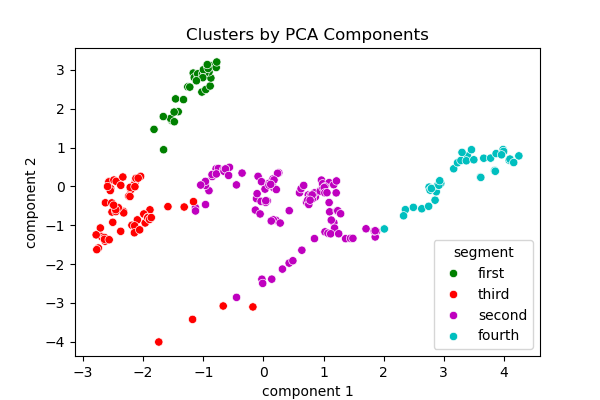

In [194]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc2_2d.png'))

#### Good cluster separation.

In [198]:
# Plot more data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc3_2d.png'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

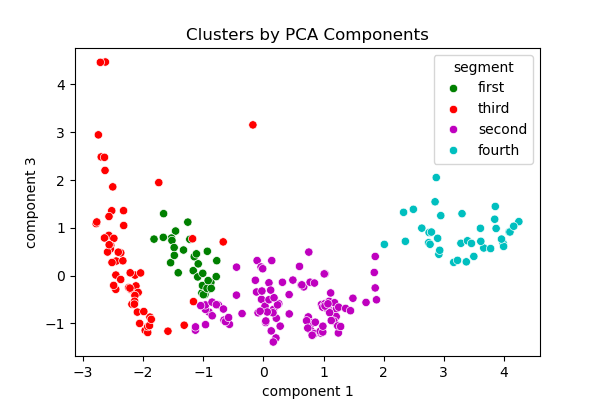

In [200]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc3_2d.png'))

#### Some overlap in 2D for red (third) and green (first), but not much.

In [206]:
# Plot more data by PCA components

x_axis = df3_pca_kmeans_time_shk['component 2']
y_axis = df3_pca_kmeans_time_shk['component 3']
plt.figure(figsize = (6, 4))
sns.scatterplot(x=x_axis, y=y_axis, hue = df3_pca_kmeans_time_shk['segment'], palette = ['g', 'r', 'm', 'c'])
plt.title('Clusters by PCA Components')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc2_pc3_2d.png'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

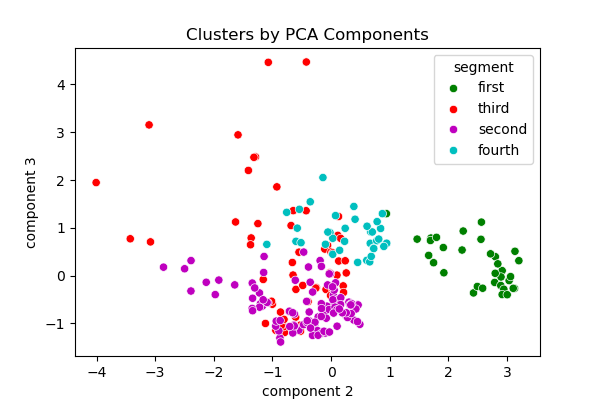

In [208]:
# Display the 2D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc2_pc3_2d.png'))

#### As for Norway, little cluster separation on a 2D plot of PC2 vs PC3.

In [214]:
# Create a 3D scatterplot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

x_axis = df3_pca_kmeans_time_shk['component 1']
y_axis = df3_pca_kmeans_time_shk['component 2']
z_axis = df3_pca_kmeans_time_shk['component 3']
clusters = df3_pca_kmeans_time_shk['segment k-means pca']

# Create custom color map
custom_map3 = mcolors.LinearSegmentedColormap.from_list('my_cmap', ['green', 'red', 'purple', 'cyan'])

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with custom colormap
scatter = ax.scatter(x_axis, y_axis, z_axis, c=clusters, cmap=custom_map3)

plt.colorbar(scatter, label='Clusters')  # Creates a colorbar to explain the color mapping

ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.title('Clusters by PCA Components in 3D')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc2_pc3_3d.png'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

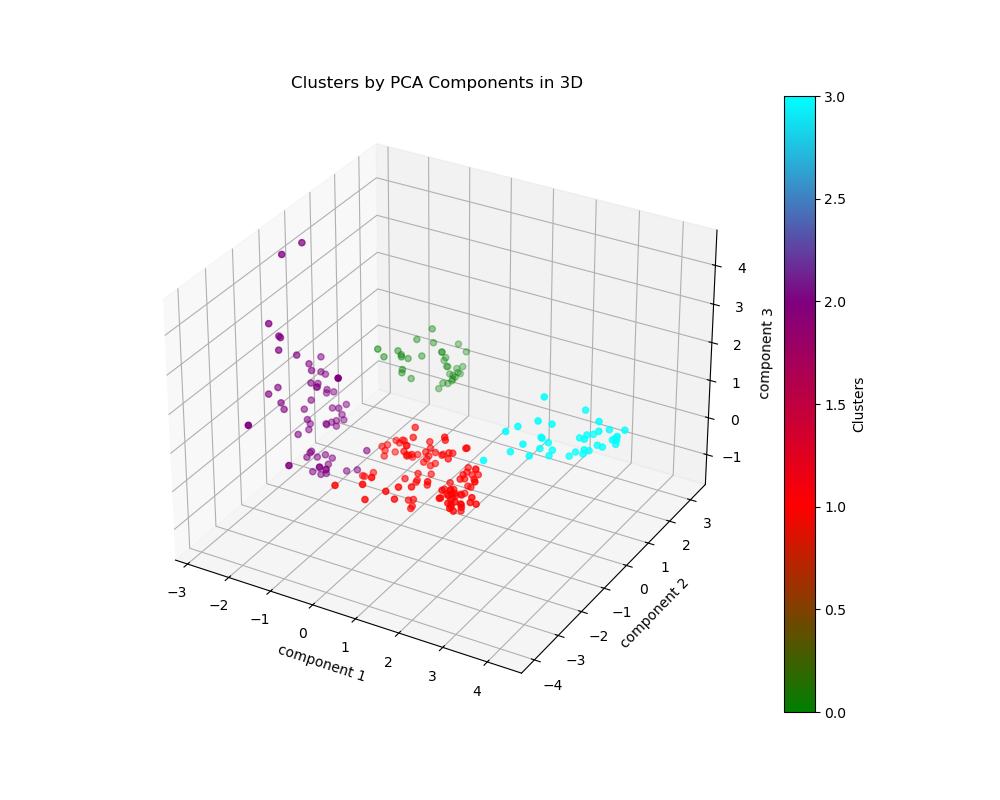

In [216]:
# Display the 3D plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_pc1_pc2_pc3_3d.png'))

#### Good cluster separation on the 3D plane.

In [218]:
# Plot a timeline of clusters for visibility into macro regimes

import matplotlib.dates as mdates  # Import this function to use in adjusting the x-axis date regime

# Define a color map for each unique shock
shock_colors = {
    'GFC': '#D62728',                  # red
    'CPC': '#FF7F0E',                 # orange
    'Cov-19': '#1F77B4',             # blue
    'Rus_Ukr_War': '#2CA02C',        # green
    'BOJ Pivot': '#9467BD',          # purple
    'Cov-19 & Rus_Ukr_War': '#8C564B',      # brown
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'    # pink
}

x_series = df3_pca_kmeans_time_shk['timestamp']
y_series = df3_pca_kmeans_time_shk['segment k-means pca']

plt.figure(figsize = (14, 6))

ax = plt.gca()  # Get the current axes

# Set the date format to Year-Month (e.g., 2020-03)
date_form = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

# Control the monthly tick spacing to show monthly ticks
# Adjust the interval as needed
# For example, to show ticks every 3 months: mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate the x-axis labels vertically for legibility
plt.xticks(rotation=90)

plt.plot(x_series, y_series, marker = 'o', linestyle = '-')

# Add color bands for each shock (skip 'No Shock')
for shock in df3_pca_kmeans_time_shk['shock_name'].unique():
    if shock != 'No Shock':
        mask = df3_pca_kmeans_time_shk['shock_name'] == shock
        start_date = df3_pca_kmeans_time_shk.loc[mask, 'timestamp'].min()
        end_date = df3_pca_kmeans_time_shk.loc[mask, 'timestamp'].max()

        # Handle hybrid shock labels by mapping to a single color
        for keyword in shock_colors:
            if keyword in shock:
                ax.axvspan(start_date, end_date,
                           color=shock_colors[keyword], alpha=0.2,
                           label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                break

plt.title('Timeline of Clusters with Shock Overlays')
plt.xlabel('Date')
plt.ylabel('Cluster Number')
ax.grid(axis='x', which='major') # This will show vertical gridlines from the x-axis ticks

# Show unique legend entries only
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.tight_layout() # Automatically adjusts subplot parameters for a tight layout
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_timeline.png'), dpi=100)
plt.close()  # Prevents visualization from automatically displaying inline

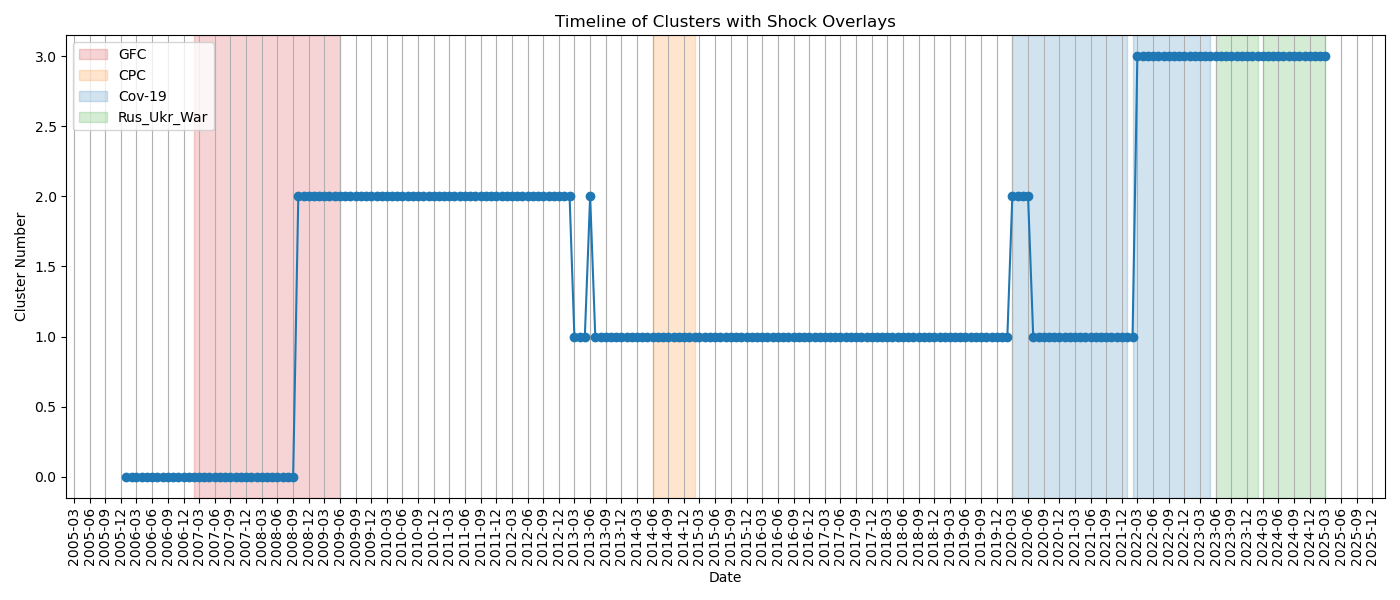

In [220]:
# Display the line plot
Image(filename=os.path.join(path, 'Analysis', 'Visualizations', 'us_clust_timeline.png'))

#### As anticipated, there is a cluster pivot during the GFC, also one during the Covid-19 era near the start of the Russia-Ukraine War. This line plot answers the question posed in the Norway analysis, regarding whether that country's special circumstances (Brent crude oil as a major export, for one) shielded it better from the GFC, suggested in its line plot by the lack of a cluster pivot during that shock period.  Moving on, the "chimney" in the line plot here is a 4-month period at the start of Covid-19 subject to extreme, sudden pressures and dislocations in global markets, especially in the US, where many variables had 3+ standard deviation movements before mean reversion forced these back to normalcy. The "steeple" in Jun 2013 and cluster pivot in Mar 2013 are a bit of a mystery. Sequester (budget control) was launched by the US government at the time, the stock market passed its pre-GFC all-time high and most of the GFC hangover was behind the country, but there was no dramatic "signal" or visible shift that might explain the pivot. Economic course changes or inflection points can happen in "quiet waters", making them difficult to sense or spot.

#### Calculate summary stats per cluster for original variables

In [222]:
summary3 = df3_pca_kmeans_time_shk.groupby('segment').agg({
    'int_rate_10y': ['mean', 'median', 'std'],
    'stock_index': ['mean', 'median', 'std'],
    'cons_prices': ['mean', 'median', 'std'],
    'unemp_rate': ['mean', 'median', 'std'],
    'vix_avg': ['mean', 'median', 'std'],
    'gbp_usd': ['mean', 'median', 'std'],
    'usd_jpy': ['mean', 'median', 'std']   
})

In [224]:
summary3.shape

(4, 21)

In [226]:
summary3

int_rate_10y                  stock_index                     \
                mean median       std        mean  median        std   
segment                                                                
first       4.463333   4.57  0.479855   83.819697   84.65   6.338092   
fourth      3.867027   3.98  0.601179  157.054054  150.75  16.693117   
second      2.113107   2.20  0.586402  113.674660  109.93  19.373030   
third       2.613621   2.73  0.879956   70.952241   70.42  13.312402   

        cons_prices                    unemp_rate  ...              vix_avg  \
               mean   median       std       mean  ...       std       mean   
segment                                            ...                        
first     87.599394   87.720  2.657113   4.839394  ...  0.462290  17.526364   
fourth   129.130270  129.540  3.705466   3.786486  ...  0.247389  18.979459   
second   104.784660  103.350  5.434973   5.143689  ...  1.315568  16.298544   
third     94.633966   93.825  4.666777   8.931034  ...  1.436395  26.471379   

                            gbp_usd                      usd_jpy           \
        median        std      mean median       std        mean   median   
segment                                                                     
first    15.33   5.822741  1.928788   1.96  0.090026  114.018182  115.880   
fourth   17.66   5.073725  1.247027   1.25  0.043644  143.437027  144.760   
second   14.84   4.384121  1.407282   1.37  0.134224  109.677670  109.800   
third    21.88  11.997662  1.552241   1.58  0.103093   87.756724   86.585   

                   
              std  
segment            
first    5.794302  
fourth   9.607233  
second   6.312125  
third    8.706801  

[4 rows x 21 columns]

## Data wrangling

#### Create a subset dataframe to facilitate time series line plots of each standardized PC and its influential variable contributors.
#### The line plots are intended to help with interpretation of PC regimes and response to exogenous shocks.
##### Rescale raw data variables into a dataframe for manipulation, rather than the default array object type created by StandardScaler()
##### scaler.set_output(transform='pandas') will change the scaled output array object into a dataframe, once scaler.fit_transform() is run

In [230]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

StandardScaler()

In [232]:
df3_std_datafr = scaler.fit_transform(df3)

In [234]:
df3_std_datafr.head(3)

,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy
0,1.413720,-0.935090,-1.478692,-0.520424,-0.886033,1.162167,0.287328
1,1.549259,-0.920489,-1.466136,-0.474522,-0.834669,1.118720,0.408915
2,1.684799,-0.884291,-1.431423,-0.520424,-0.927840,1.075273,0.368386


##### Wrangle the data from two dataframes into a subset dataframe that will be used for the line plots

In [239]:
df3_pca_kmeans_time_shk.columns

Index(['timestamp', 'shock_name', 'int_rate_10y', 'stock_index', 'cons_prices',
       'unemp_rate', 'vix_avg', 'gbp_usd', 'usd_jpy', 'component 1',
       'component 2', 'component 3', 'segment k-means pca', 'segment'],
      dtype='object')

In [241]:
df3_pca_kmeans_time_shk.head(3)

,timestamp,shock_name,int_rate_10y,stock_index,cons_prices,unemp_rate,vix_avg,gbp_usd,usd_jpy,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,4.42,74.89,83.66,4.7,12.04,1.76,115.66,-1.023674,2.427893,-0.363660,0,first
1,2006-02-01,No Shock,4.57,75.37,83.83,4.8,12.47,1.75,117.97,-0.958425,2.493521,-0.228584,0,first
2,2006-03-01,No Shock,4.72,76.56,84.30,4.7,11.69,1.74,117.20,-0.885783,2.584095,-0.265442,0,first


In [243]:
us_pc_df3_std = df3_pca_kmeans_time_shk[['timestamp', 'shock_name', 'component 1', 'component 2', 'component 3', \
                                             'segment k-means pca', 'segment']]

In [245]:
us_pc_df3_std.head(3)

,timestamp,shock_name,component 1,component 2,component 3,segment k-means pca,segment
0,2006-01-01,No Shock,-1.023674,2.427893,-0.363660,0,first
1,2006-02-01,No Shock,-0.958425,2.493521,-0.228584,0,first
2,2006-03-01,No Shock,-0.885783,2.584095,-0.265442,0,first


##### The 3 PC variables need to be standardized to enable like-with-like scale comparisons with their standardized key component variables in the time series line plots further below.

In [248]:
columns_to_scale = ['component 1', 'component 2', 'component 3']

In [250]:
# Instantiates the StandardScaler class and assigns the newly-created instance to the variable 'scaler'
scaler = StandardScaler()  

##### Note: it is necessary to use the .loc[] indexing (below) to avoid a SettingWithCopyWarning message regarding attempting to modify a dataframe that is potentially a "view' of another dataframe, rather than an independent "copy". 

In [253]:
# The expression to the right of the "=" sign rescales the data in the 3 columns named in the variable (a list) 'columns_to_scale'
# The entire script overwrites the 3 columns with the rescaled data

us_pc_df3_std.loc[:, (columns_to_scale)] = scaler.fit_transform(us_pc_df3_std[columns_to_scale])

In [255]:
# Column names for the standardized PCs need to be renamed for accurate labeling
us_pc_df3_std = us_pc_df3_std.rename(columns={'component 1': 'component_1_std', 'component 2': 'component_2_std', \
                                             'component 3': 'component_3_std'})

In [259]:
# Check a dataframe containing scaled data columns to be added
df3_std_datafr.columns

Index(['int_rate_10y', 'stock_index', 'cons_prices', 'unemp_rate', 'vix_avg',
       'gbp_usd', 'usd_jpy'],
      dtype='object')

In [261]:
us_pc_df3_std.loc[:, ['int_rate_10y', 'stock_index', 'cons_prices', 'unemp_rate', 'vix_avg', \
       'gbp_usd', 'usd_jpy']] = df3_std_datafr[['int_rate_10y', 'stock_index', 'cons_prices', 'unemp_rate', 'vix_avg', \
       'gbp_usd', 'usd_jpy']]

In [263]:
# Column names for the standardized original variables need to be renamed for accurate labeling

us_pc_df3_std = us_pc_df3_std.rename(columns={'int_rate_10y': 'int_rate_10y_std', 'stock_index': 'stock_index_std', \
                                             'cons_prices': 'cons_prices_std', 'unemp_rate': 'unemp_rate_std', \
                                             'vix_avg': 'vix_avg_std', 'gbp_usd': 'gbp_usd_std', 'usd_jpy': 'usd_jpy_std'})

In [265]:
us_pc_df3_std.shape

(231, 14)

In [267]:
us_pc_df3_std.head(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,cons_prices_std,unemp_rate_std,vix_avg_std,gbp_usd_std,usd_jpy_std
0,2006-01-01,No Shock,-0.538410,1.881062,-0.379316,0,first,1.413720,-0.935090,-1.478692,-0.520424,-0.886033,1.162167,0.287328
1,2006-02-01,No Shock,-0.504092,1.931909,-0.238424,0,first,1.549259,-0.920489,-1.466136,-0.474522,-0.834669,1.118720,0.408915
2,2006-03-01,No Shock,-0.465885,2.002083,-0.276870,0,first,1.684799,-0.884291,-1.431423,-0.520424,-0.927840,1.075273,0.368386


In [269]:
us_pc_df3_std.tail(3)

,timestamp,shock_name,component_1_std,component_2_std,component_3_std,segment k-means pca,segment,int_rate_10y_std,stock_index_std,cons_prices_std,unemp_rate_std,vix_avg_std,gbp_usd_std,usd_jpy_std
228,2025-01-01,Rus_Ukr_War & BOJ Pivot,2.234184,0.607991,1.177720,3,fourth,1.603475,2.354953,2.241585,-0.841740,-0.322227,-1.140538,2.440629
229,2025-02-01,Rus_Ukr_War & BOJ Pivot,2.189097,0.474822,1.076837,3,fourth,1.440828,2.498831,2.285162,-0.795838,-0.297142,-1.053643,2.185876
230,2025-03-01,Rus_Ukr_War & BOJ Pivot,2.028116,0.300735,1.508698,3,fourth,1.287216,2.324839,2.308058,-0.795838,0.284582,-0.879854,2.047445


##### The subset dataframe "us_pc_df3_std" created above will be used as the dataframe in the next line plots

In [272]:
# Check the columns
us_pc_df3_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'cons_prices_std', 'unemp_rate_std', 'vix_avg_std',
       'gbp_usd_std', 'usd_jpy_std'],
      dtype='object')

## Define a custom function

In [277]:
import matplotlib.dates as mdates

# Define color map for known shocks
shock_colors = {
    'GFC': '#D62728',
    'CPC': '#FF7F0E',
    'Cov-19': '#1F77B4',
    'Rus_Ukr_War': '#2CA02C',
    'BOJ Pivot': '#9467BD',
    'Cov-19 & Rus_Ukr_War': '#8C564B',
    'Rus_Ukr_War & BOJ Pivot': '#E377C2'
}

# Optional: Define known cluster pivot points (YYYY-MM format strings)
cluster_pivots = {
    '2008-10': 'Cluster 0→2 Pivot',
    '2013-03': 'Cluster 2→1 Pivot',
    '2013-06': 'Cluster 1→2 Pivot',
    '2013-07': 'Cluster 2→1 Pivot',
    '2020-03': 'Cluster 1→2 Pivot',
    '2020-07': 'Cluster 2→1 Pivot',
    '2022-03': 'Cluster 1→3 Pivot'
}

def plot_pc_with_components_and_shocks(x, pc_series, comp_dict, df, pc_label='PC1', title=None,
                                       show_cluster_pivots=True, cluster_pivots=cluster_pivots):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=90)

    # Plot the PC and components
    plt.plot(x, pc_series, label=pc_label, marker='o')
    for comp_name, comp_series in comp_dict.items():
        plt.plot(x, comp_series, label=comp_name, marker='o')

    # Shock overlays as colored bands
    for shock in df['shock_name'].unique():
        if shock != 'No Shock':
            mask = df['shock_name'] == shock
            start_date = df.loc[mask, 'timestamp'].min()
            end_date = df.loc[mask, 'timestamp'].max()
            for keyword in shock_colors:
                if keyword in shock:
                    ax.axvspan(start_date, end_date, color=shock_colors[keyword], alpha=0.2,
                               label=keyword if keyword not in ax.get_legend_handles_labels()[1] else "")
                    break

    # Cluster pivot lines and annotations
    if show_cluster_pivots:
        for date_str, label in cluster_pivots.items():
            date = pd.to_datetime(date_str)
            ax.axvline(date, color='black', linestyle='--', linewidth=1.3)
            plt.text(date, ax.get_ylim()[1]*0.92, label, rotation=90, fontsize=9,
                     color='black', va='top', ha='center',
                     bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    # Title, labels, legend
    plt.title(title or f'United States: Standardized {pc_label} and High-Loading Components with Shocks')
    plt.xlabel('Date')
    plt.ylabel('Standardized Value')
    ax.grid(axis='x', which='major')

    # Deduplicate legend entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

    plt.tight_layout()
    plt.show()

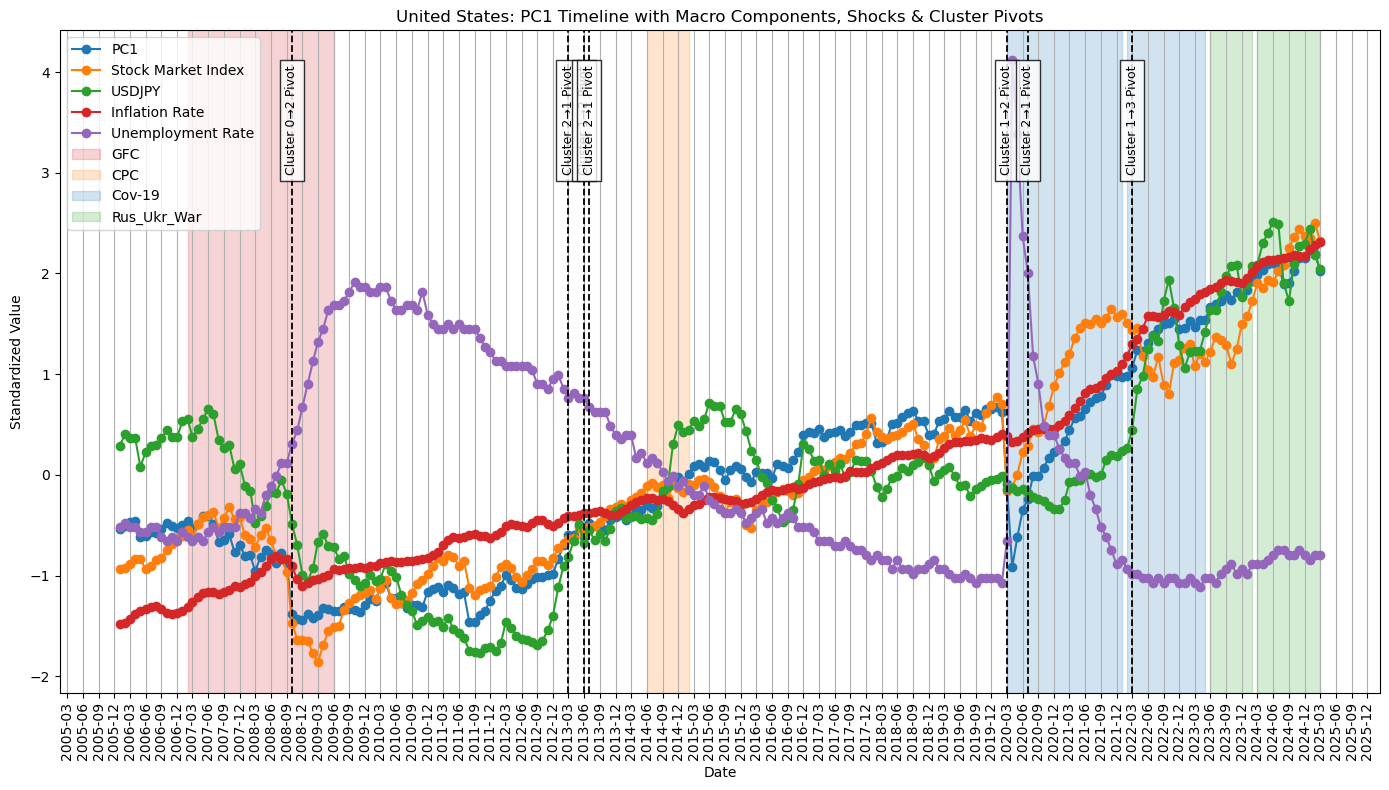

In [281]:
# Call the custom function to output the first line plot

plot_pc_with_components_and_shocks(
    x=us_pc_df3_std['timestamp'],
    pc_series=us_pc_df3_std['component_1_std'],
    comp_dict={
        'Stock Market Index': us_pc_df3_std['stock_index_std'],
        'USDJPY': us_pc_df3_std['usd_jpy_std'],
        'Inflation Rate': us_pc_df3_std['cons_prices_std'],
        'Unemployment Rate': us_pc_df3_std['unemp_rate_std']
    },
    df=us_pc_df3_std,
    pc_label='PC1',
    title='United States: PC1 Timeline with Macro Components, Shocks & Cluster Pivots'
)

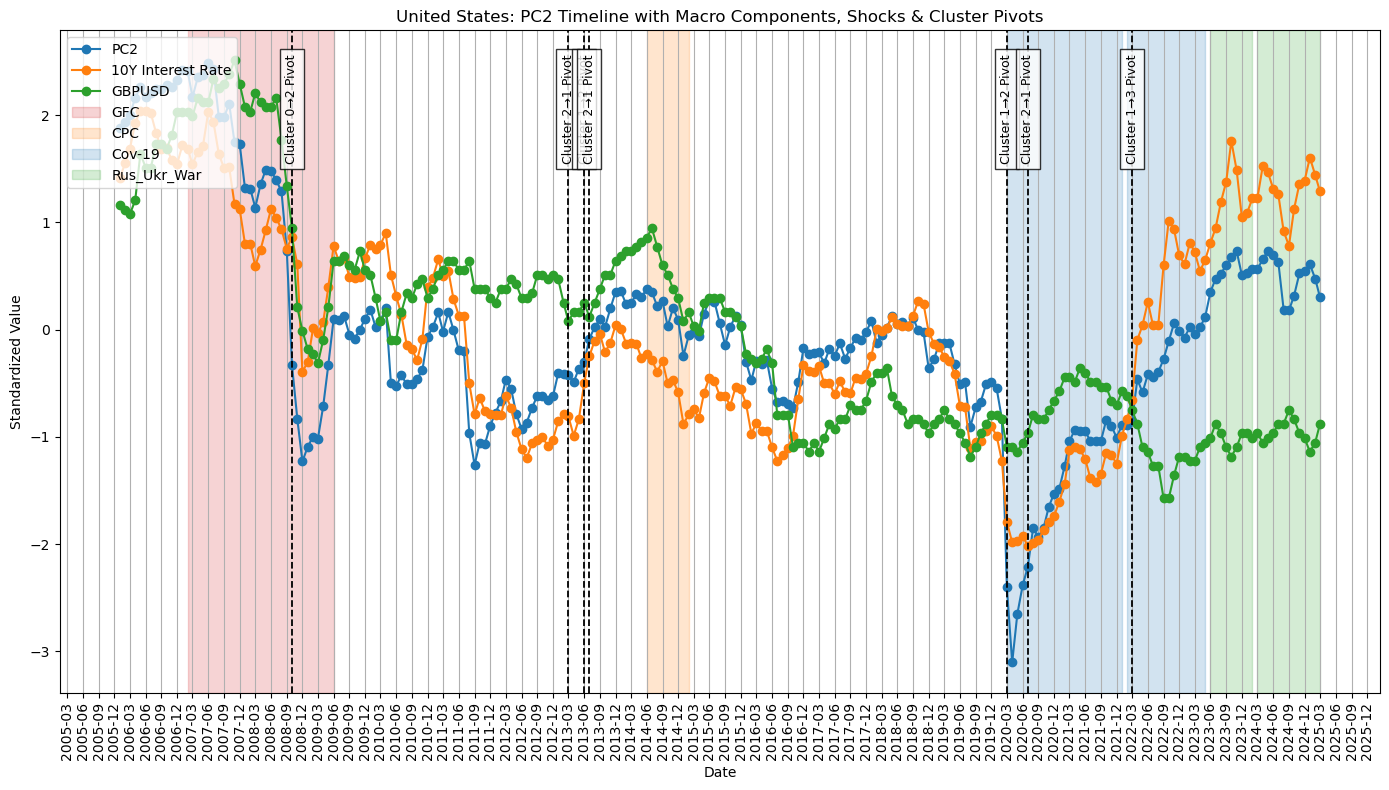

In [283]:
# Call the custom function to output the second line plot

plot_pc_with_components_and_shocks(
    x=us_pc_df3_std['timestamp'],
    pc_series=us_pc_df3_std['component_2_std'],
    comp_dict={
        '10Y Interest Rate': us_pc_df3_std['int_rate_10y_std'],
        'GBPUSD': us_pc_df3_std['gbp_usd_std']
    },
    df=us_pc_df3_std,
    pc_label='PC2',
    title='United States: PC2 Timeline with Macro Components, Shocks & Cluster Pivots'
)

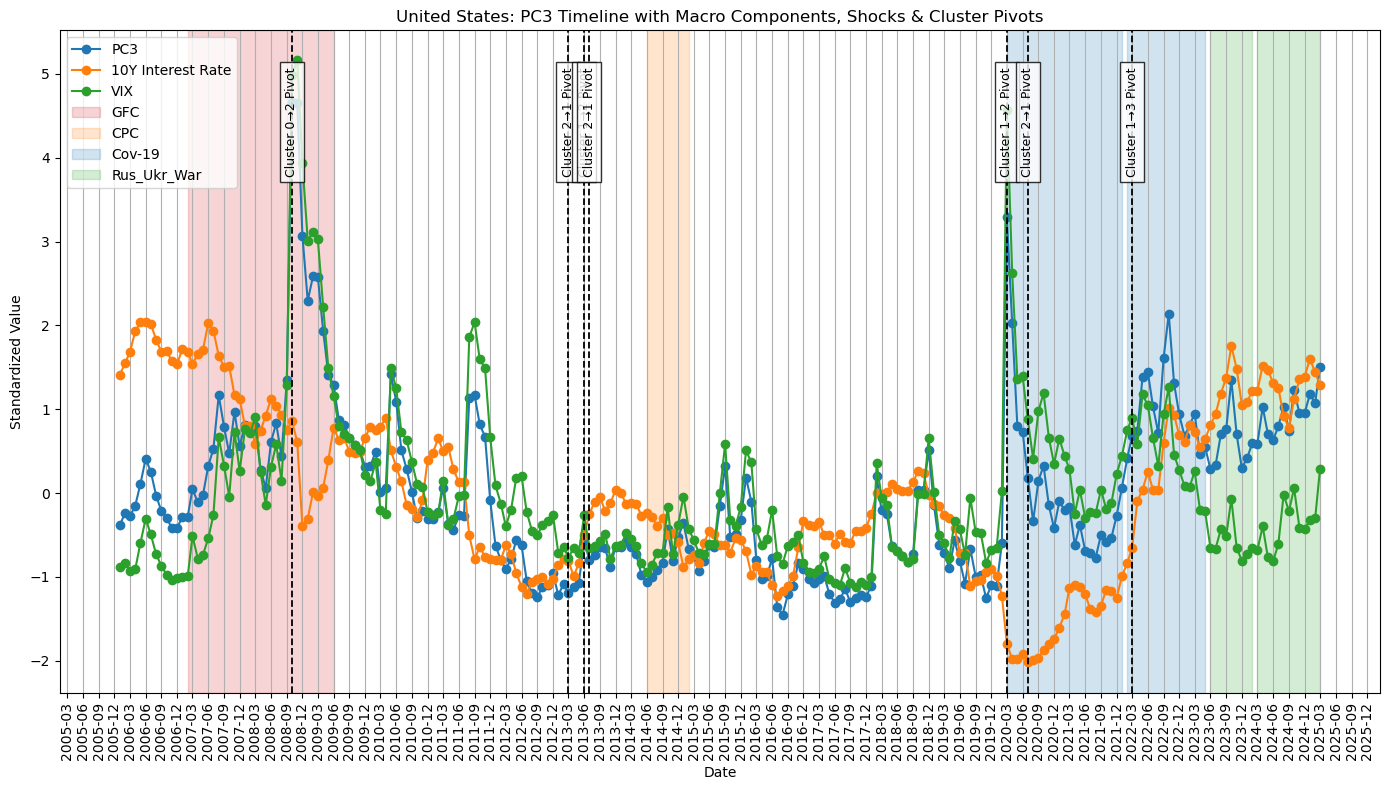

In [285]:
# Call the custom function to output the third line plot

plot_pc_with_components_and_shocks(
    x=us_pc_df3_std['timestamp'],
    pc_series=us_pc_df3_std['component_3_std'],
    comp_dict={
        '10Y Interest Rate': us_pc_df3_std['int_rate_10y_std'],
        'VIX': us_pc_df3_std['vix_avg_std']
    },
    df=us_pc_df3_std,
    pc_label='PC3',
    title='United States: PC3 Timeline with Macro Components, Shocks & Cluster Pivots'
)

### 07. Extension: United States SRS component data derivation

#### Comment:

#### The Shock Resilience Score (“SRS”) is an economic resilience metric co-developed with ChatGPT. It measures how robust a country’s economy is during major or moderate exogenous shocks.

#### Based on project observations, the Global Financial Crisis (GFC) and Covid-19 caused major system-wide disruptions. The Commodity Price Collapse (CPC) had moderate impact, while the Russia–Ukraine War and the BoJ Interest Rate Pivot produced only localized effects (e.g., natural gas to Europe or partial unwind of the global carry trade).

#### Accordingly, the SRS will focus on the GFC, Covid-19, and CPC when evaluating the seven OECD countries profiled: Norway, the United States, Germany, Japan, South Korea, Switzerland, and Australia.

#### SRS derivation enables a comparative ranking of economic resilience — and may yield some surprising results.

In [291]:
# Check some of the data content that will be used in SRS component calculations
us_pc_df3_std.columns

Index(['timestamp', 'shock_name', 'component_1_std', 'component_2_std',
       'component_3_std', 'segment k-means pca', 'segment', 'int_rate_10y_std',
       'stock_index_std', 'cons_prices_std', 'unemp_rate_std', 'vix_avg_std',
       'gbp_usd_std', 'usd_jpy_std'],
      dtype='object')

##### Export dataframe for Excel-based SRS component calculations 

In [294]:
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
us_pc_df3_std.to_excel(os.path.join(path, 'Data', 'Prepared Data', 'us_srs_raw.xlsx'))